In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("google-play-store.csv")

In [13]:
df.head()

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
0,com.prettyteengames.royal.princess.wedding.mak...,Royal Princess Wedding Makeover and Dress Up,375.0,1023.0,100000,4.179863,True,True,2017-12-20,3,Casual,GAME_CASUAL,0.0,115,31,98,90,689
1,com.MayGreenStudio.dressup,Momo's Dressup,13492.0,25974.0,1000000,4.711096,False,True,2017-03-07,42,Casual,GAME_CASUAL,0.0,673,213,806,2561,21721
2,air.theflash.f2game.PrettyGirl23,Princess Pretty Girl,1974.0,4610.0,500000,4.295445,False,True,2015-01-18,3,Casual,GAME_CASUAL,0.0,382,206,287,528,3207
3,air.com.dressupone.animeschooluniforms,Anime School Uniforms,2586.0,6081.0,500000,4.209505,False,True,2013-08-20,3,Casual,GAME_CASUAL,0.0,628,193,524,668,4068
4,air.theflash.f2game.PrettyGirl7,Wedding Pretty girl,1409.0,3728.0,500000,4.195011,False,True,2014-09-01,2,Casual,GAME_CASUAL,0.0,358,185,300,414,2471


In [15]:
df.shape

(62694, 18)

In [17]:
# Q1: how many apps are there in dataset?



In [19]:
df["app_id"].value_counts()

app_id
com.prettyteengames.royal.princess.wedding.makeover    1
com.ankama.cosmobot                                    1
mosa.apps.khalid_alrashid                              1
com.dan.kaftan.mathgame                                1
ink.hue.pme                                            1
                                                      ..
com.jpbrothers.android.pictail.sub4                    1
gallery.gallerydownload.gallerylocker                  1
com.insfull.bigprofilepicture                          1
com.hhyu.neuron                                        1
com.ninepixel.whitehorseprincessandroid                1
Name: count, Length: 62694, dtype: int64

In [21]:
df["app_id"].nunique()

62694

In [23]:
df["app_id"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62689    False
62690    False
62691    False
62692    False
62693    False
Name: app_id, Length: 62694, dtype: bool

In [25]:
df["app_id"].duplicated().sum()

0

In [27]:
df[df["app_id"].duplicated()]

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star


In [29]:
# Q2: What are the top five genres of apps by count?


In [41]:
df.groupby("genre" , as_index=False).size().sort_values("size", ascending=False).head(5)

,genre,size
15,Education,6673
42,Tools,6192
17,Entertainment,3395
7,Books & Reference,3052
24,Lifestyle,2797


In [47]:
df["genre"].value_counts().head(5)

genre
Education            6673
Tools                6192
Entertainment        3395
Books & Reference    3052
Lifestyle            2797
Name: count, dtype: int64

In [51]:
for name, group in df.groupby("genre"):
    print(name)
    print("###################")
    print(group)
    break

Action
###################
                                                  app_id  \
62                                         com.io.goozio   
64                           com.globalfun.vilgax.google   
65                     com.globalfun.ben10omniverse.free   
66                          com.nazara.chotabheemthehero   
134                             com.imayi.jurassicrescue   
...                                                  ...   
62185             com.motionartgames.medievalwarfighting   
62404                               com.playmobil.kaboom   
62406                                   com.amuzo.plytat   
62475  com.threed.flying.robot.car.transformation.rus...   
62627                            com.jaeyunnoh.braainsio   

                                                   title  reviews  ratings  \
62                                               gooz io   2345.0   6215.0   
64                                Ben 10: Omnitrix Power   8642.0  29946.0   
65                

In [53]:
# Q4: What is the average rating score for all apps?
# What is the average rating score for each genre?

In [55]:
df["score"].mean()

4.221623968066303

In [57]:
df.groupby("genre")["score"].mean()

genre
Action                     4.246685
Adventure                  4.263523
Arcade                     4.245784
Art & Design               4.256043
Auto & Vehicles            4.067935
Beauty                     3.960839
Board                      4.330235
Books & Reference          4.515021
Business                   3.970834
Card                       4.297853
Casino                     4.450163
Casual                     4.278394
Comics                     4.026682
Communication              4.150248
Dating                     4.010680
Education                  4.305718
Educational                4.245944
Entertainment              4.238799
Events                     3.892029
Finance                    4.133832
Food & Drink               4.009907
Health & Fitness           4.007215
House & Home               3.966072
Libraries & Demo           4.207910
Lifestyle                  4.181246
Maps & Navigation          3.842826
Medical                    3.987783
Music                 

In [61]:
df.groupby("genre").agg({"score":"mean"})

,score
genre,
Action,4.246685
Adventure,4.263523
Arcade,4.245784
Art & Design,4.256043
Auto & Vehicles,4.067935
Beauty,3.960839
Board,4.330235
Books & Reference,4.515021
Business,3.970834


In [65]:
df.groupby("genre" , as_index=False).agg({"score":"mean"}).sort_values("score", ascending=False).head()

,genre,score
7,Books & Reference,4.515021
47,Word,4.494153
31,Personalization,4.476157
28,Music & Audio,4.459054
10,Casino,4.450163


In [67]:
# Q5: Visualize the output in the Q4.

In [81]:
df_Q5=df.groupby("genre").agg({"score":"mean"})

In [83]:
df_Q5.head()

,score
genre,
Action,4.246685
Adventure,4.263523
Arcade,4.245784
Art & Design,4.256043
Auto & Vehicles,4.067935


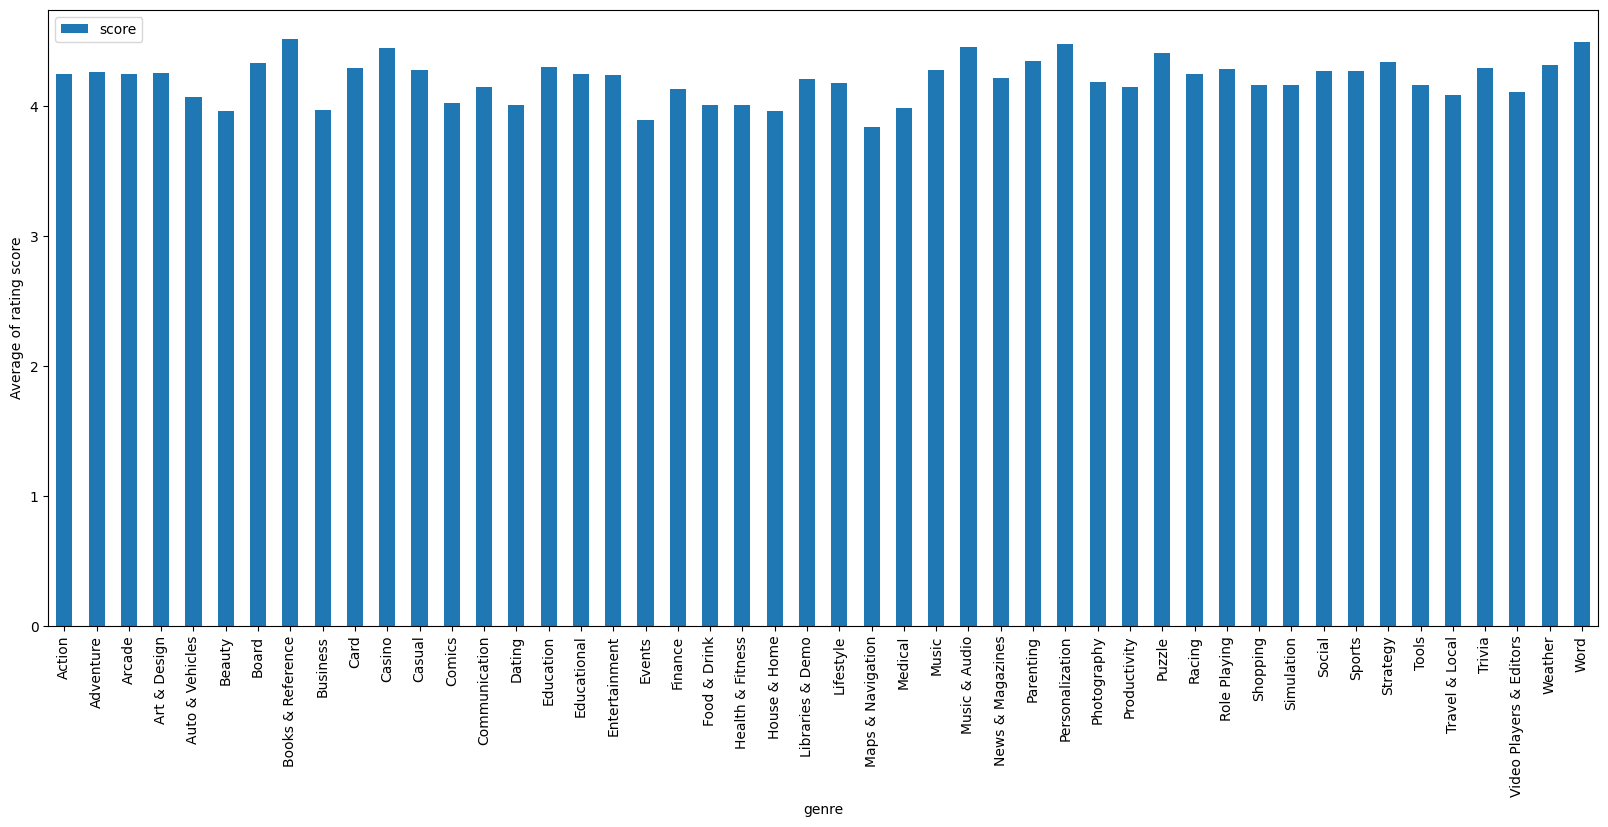

In [111]:
df_Q5.plot(kind="bar",figsize=(20,8))
plt.ylabel("Average of rating score")
plt.show()

In [115]:
# Q6: Use the same visualation above but now classify the genres into two groups. Above average, belove average.
# Show both with different colors.